# Ανάλυση Δεδομένων Μάθησης - Ομαδική Εργασία | Κελεπίρη Ζωή (78) & Ευάγγελος Βασιλόγαμβρος (100)

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [3]:
import pandas as pd
df = pd.DataFrame(data=X)
df['class'] = y

In [4]:
df.describe()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
df.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object

In [7]:
dfAlcohol = df['Alcohol']
dfMalicacid = df['Malicacid']
dfAsh = df['Ash']
dfAlcalinity_of_ash = df['Alcalinity_of_ash']
dfMagnesium = df['Magnesium']
dfTotal_phenols = df['Total_phenols']
dfFlavanoids = df['Flavanoids']
dfNonflavanoid_phenols = df['Nonflavanoid_phenols']
dfProanthocyanins = df['Proanthocyanins']
dfColor_intensity = df['Color_intensity']
dfHue = df['Hue']
df0D280_0D315_of_diluted_wines = df['0D280_0D315_of_diluted_wines']
dfProline = df['Proline']
dfclass = df['class']



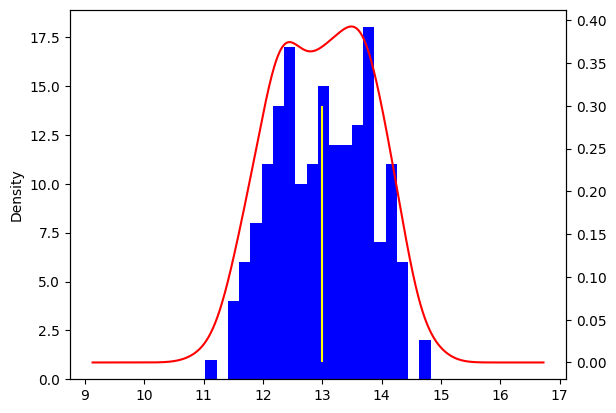

In [8]:
# plot for dfAlcohol
import matplotlib.pyplot as plt
%matplotlib inline
dfAlcohol.plot(kind = 'hist', bins = 20, color = 'blue')
dfAlcohol.plot(kind = 'kde', secondary_y = True, color = 'red')
plt.vlines(dfAlcohol.mean(), ymin = 0, ymax = 0.3, linewidth = 1.5, color = 'yellow' )

In [ ]:
for column in df.columns:
    # Create a histogram for each variable
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='blue', edgecolor='black')

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

    # Show the plot
    plt.show()

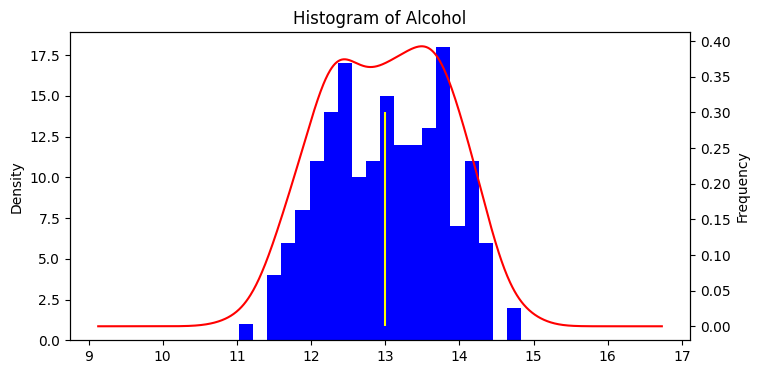

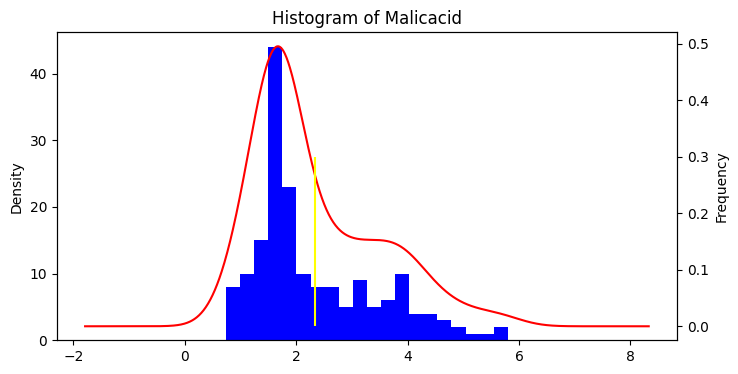

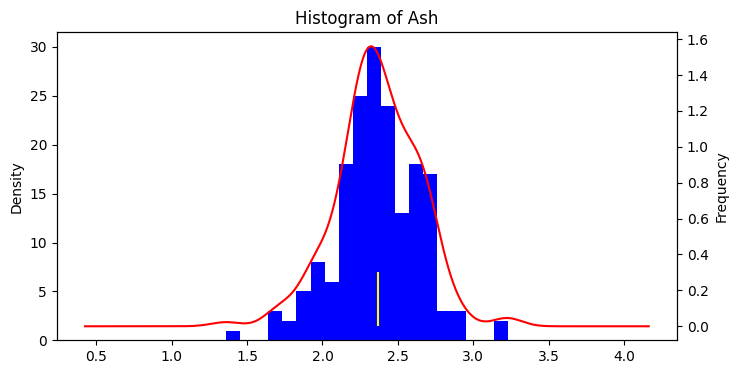

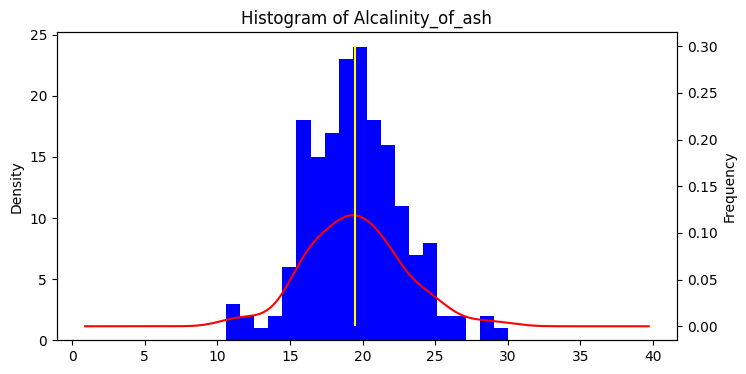

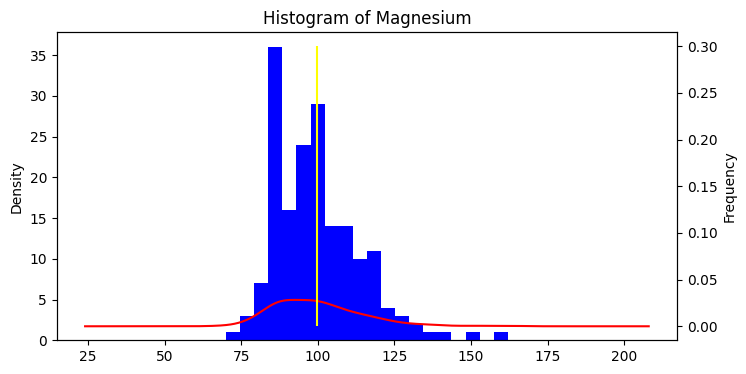

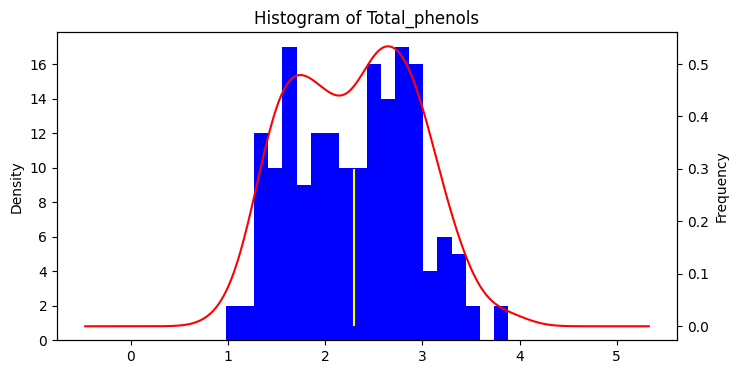

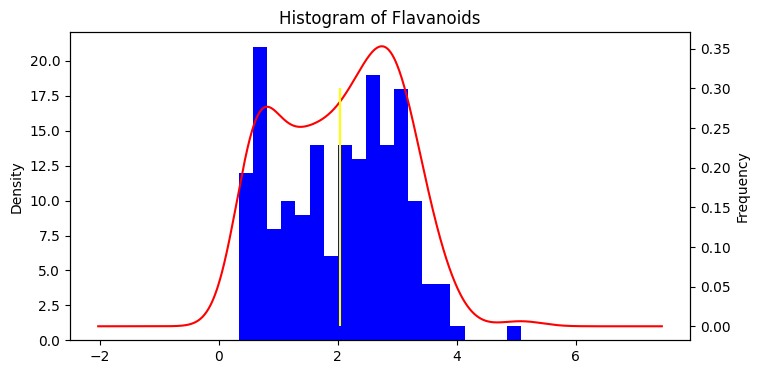

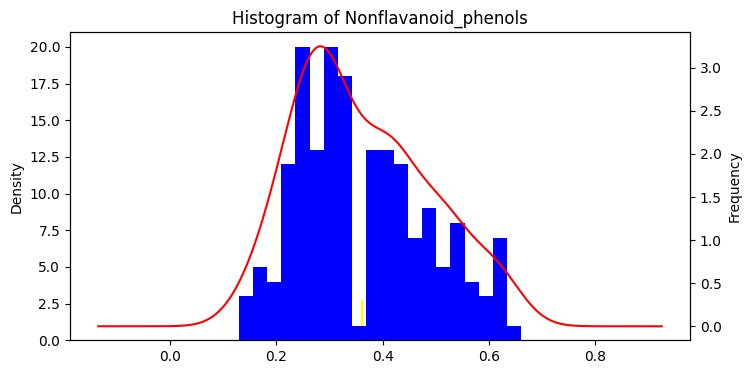

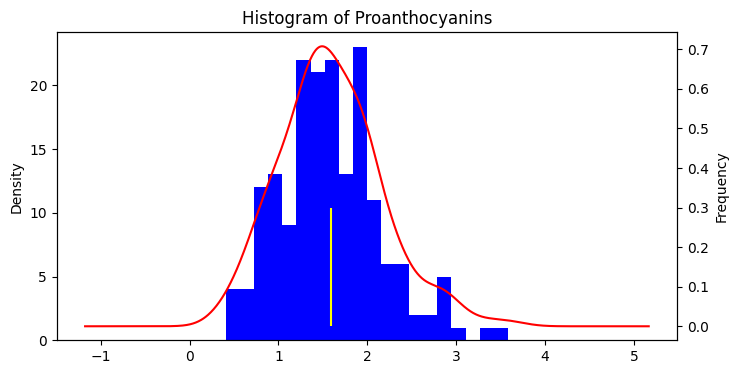

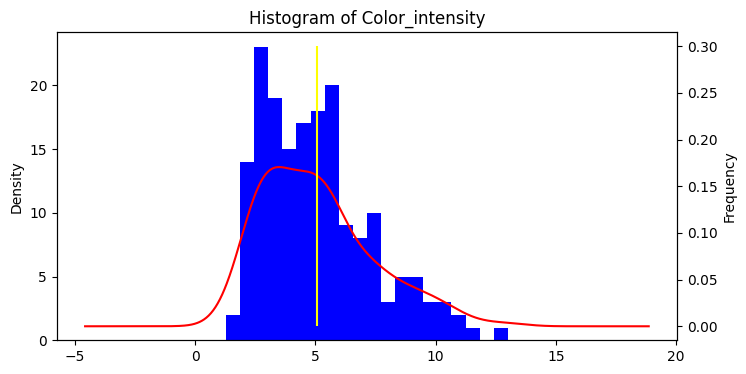

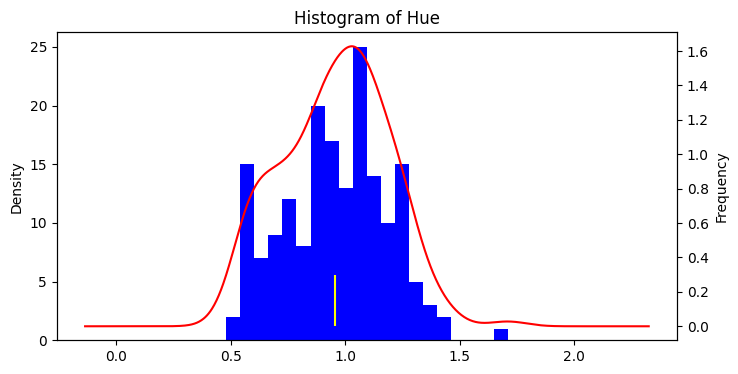

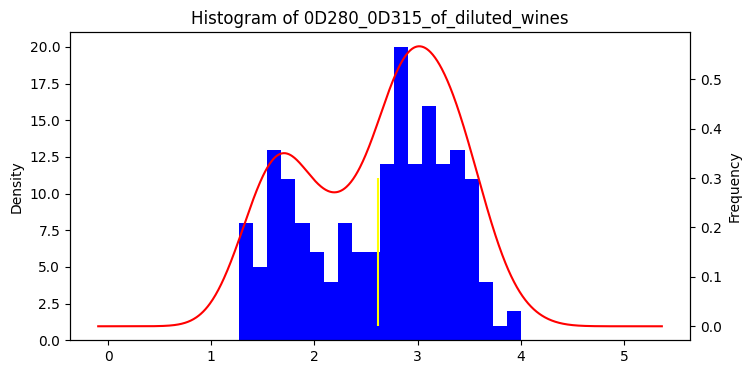

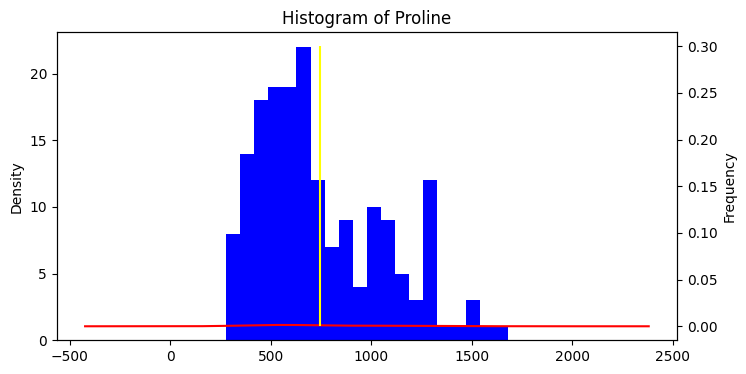

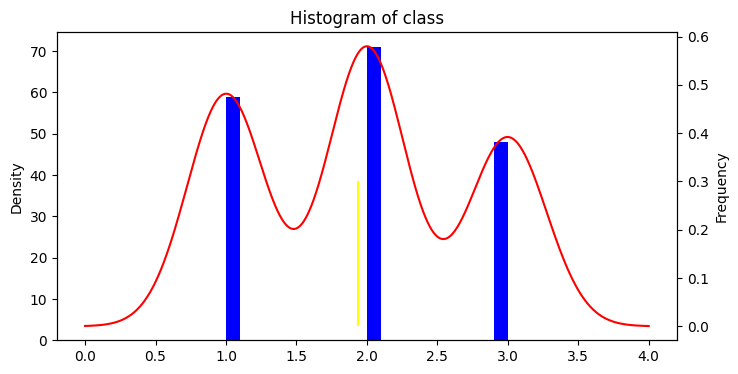

In [42]:
for column in df.columns:
    # Create a histogram for each variable
    plt.figure(figsize=(8,4))
    df[column].plot(kind = 'hist', bins = 20, color = 'blue')
    df[column].plot(kind = 'kde', secondary_y = True, color = 'red')
    plt.vlines(df[column].mean(), ymin = 0, ymax = 0.3, linewidth = 1.5, color = 'yellow' )
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')

    # Show the plot
    plt.show()


In [ ]:
for column in df.columns:
    # Create a boxplot for each variable
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.title(f'Boxplot of {column}')

    # Show the plot
    plt.show()

In [ ]:
import seaborn as sns

for column in df.columns:
# Create a box plot for each variable
  plt.figure(figsize=(8, 6))
  sns.boxplot(x= df['class'], y= df[column])
  plt.title(f'Boxplot')
  plt.show()

In [33]:
#skewness for each var
skewness_df = pd.DataFrame(columns=['Variable', 'Skewness'])
for column in df.columns:
    # Calculate the skewness for each variable
    skewness = df[column].skew()
    skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)

# Print or store the skewness values
print(skewness_df)

                        Variable  Skewness
0                        Alcohol -0.051482
1                      Malicacid  1.039651
2                            Ash -0.176699
3              Alcalinity_of_ash  0.213047
4                      Magnesium  1.098191
5                  Total_phenols  0.086639
6                     Flavanoids  0.025344
7           Nonflavanoid_phenols  0.450151
8                Proanthocyanins  0.517137
9                Color_intensity  0.868585
10                           Hue  0.021091
11  0D280_0D315_of_diluted_wines -0.307285
12                       Proline  0.767822
13                         class  0.107431


<ipython-input-33-dc94bdc83f0f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-33-dc94bdc83f0f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-33-dc94bdc83f0f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append({'Variable': column, 'Skewness': skewness}, ignore_index=True)
<ipython-input-33-dc94bdc83f0f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  skewness_df = skewness_df.append

In [34]:
#coefficient correlation
df.corr()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
Malicacid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


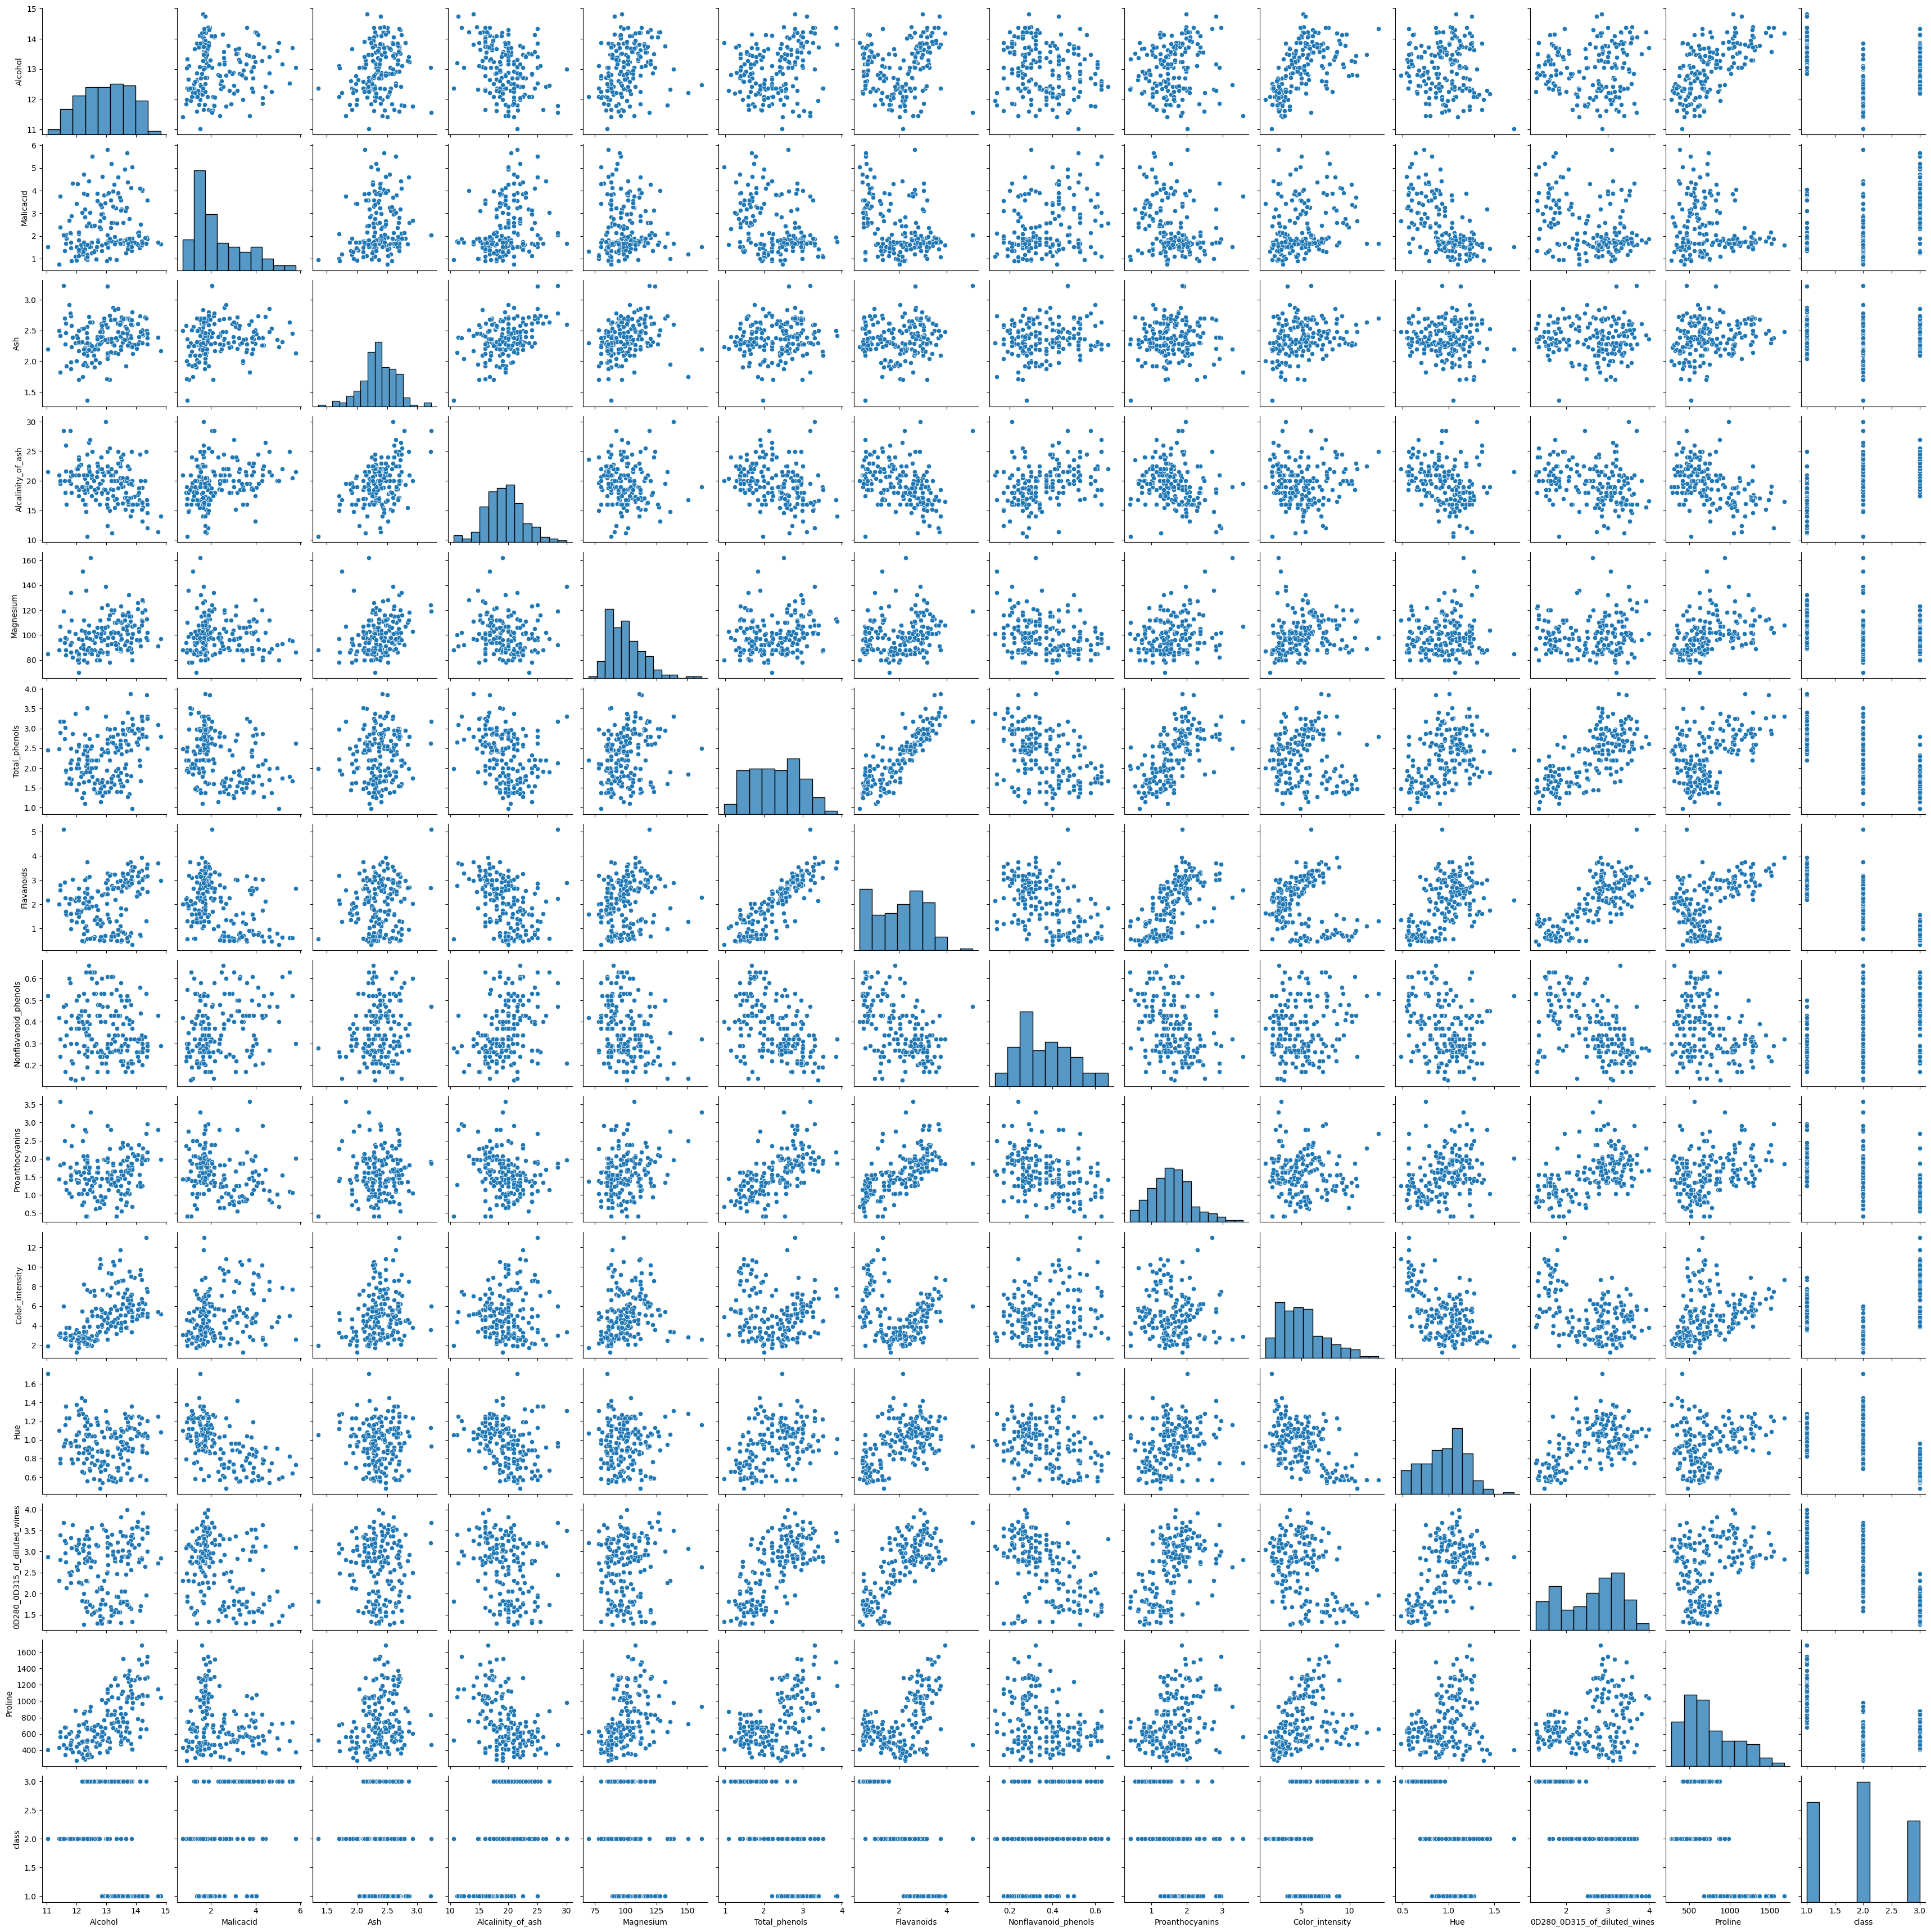

In [35]:
# correlation plots
import seaborn as sns
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Heatmap')

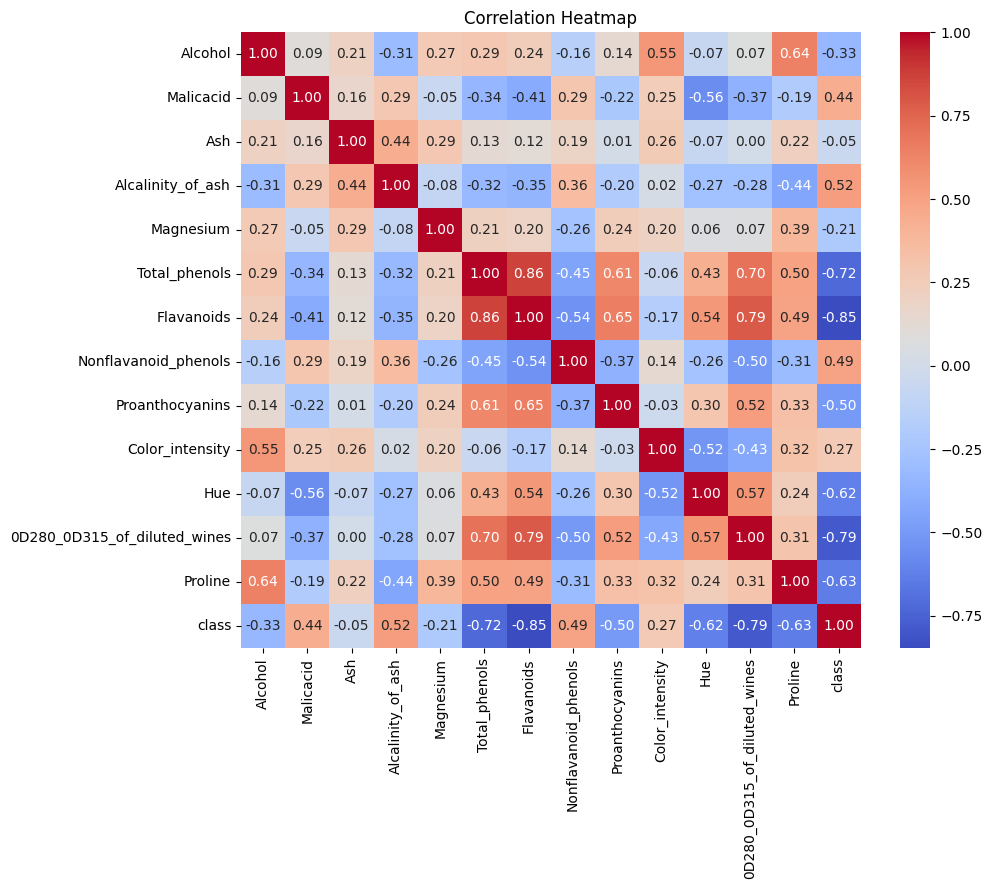

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

## Ανάλυση Δεδομένων
Descriptive Analysis: Histogram for the numeric, box plot for all and freq for the class variable (categorical) --> normal distribtion check, skewness, kyrtosis
Hypothesis Test:ch-square test
Correlation graph and values
Regression & Classification: XGB, Extra trees classifier, RF and Gradient Boosting Classifier.
Logistic Regression, Desicion Trees, Random Forest, KNN (#= k), Gradient Boosting (e.g., XGBoost, LightGBM), AdaBoost
zoi --> logistic, rf, knn / measurement model, predictive
vaggelis --> decision trees, gradient boosting, adaboost / six w, predictive


## Ανάλυση Δεδομένων